In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df= df.drop('Age', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [8]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,  33.6  ,   0.627],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,  26.6  ,   0.351],
       [  8.   , 183.   ,  64.   , ...,   0.   ,  23.3  ,   0.672],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,  26.2  ,   0.245],
       [  1.   , 126.   ,  60.   , ...,   0.   ,  30.1  ,   0.349],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,  30.4  ,   0.315]])

In [9]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [63]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [66]:
model.fit(X_train, y_train, epochs=500, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 691 samples, validate on 77 samples
Epoch 1/500
691/691 [==============================] - 1s 842us/sample - loss: 0.8251 - accuracy: 0.3661 - val_loss: 0.7654 - val_accuracy: 0.3506
Epoch 2/500
691/691 [==============================] - 0s 101us/sample - loss: 0.7797 - accuracy: 0.4023 - val_loss: 0.7152 - val_accuracy: 0.4156
Epoch 3/500
691/691 [==============================] - 0s 90us/sample - loss: 0.7342 - accuracy: 0.4616 - val_loss: 0.6834 - val_accuracy: 0.5325
Epoch 4/500
691/691 [==============================] - 0s 105us/sample - loss: 0.7034 - accuracy: 0.5253 - val_loss: 0.6645 - val_accuracy: 0.7013
Epoch 5/500
691/691 [==============================] - 0s 102us/sample - loss: 0.6951 - accuracy: 0.5586 - val_loss: 0.6533 - val_accuracy: 0.7013
Epoch 6/500
691/691 [==============================] - 0s 118us/sample - loss: 0.6793 - accuracy: 0.6064 - val_loss: 0.6460 - val_accuracy: 0.6883
Epoch 7/500
691/691 [==============================] - 0s 102us/sample - l

691/691 [==============================] - 0s 114us/sample - loss: 0.5906 - accuracy: 0.7106 - val_loss: 0.5777 - val_accuracy: 0.7143
Epoch 57/500
691/691 [==============================] - 0s 87us/sample - loss: 0.5898 - accuracy: 0.7192 - val_loss: 0.5762 - val_accuracy: 0.7143
Epoch 58/500
691/691 [==============================] - 0s 95us/sample - loss: 0.5826 - accuracy: 0.7308 - val_loss: 0.5750 - val_accuracy: 0.7273
Epoch 59/500
691/691 [==============================] - 0s 94us/sample - loss: 0.5808 - accuracy: 0.7120 - val_loss: 0.5731 - val_accuracy: 0.7273
Epoch 60/500
691/691 [==============================] - 0s 92us/sample - loss: 0.5840 - accuracy: 0.7424 - val_loss: 0.5715 - val_accuracy: 0.7273
Epoch 61/500
691/691 [==============================] - 0s 84us/sample - loss: 0.5727 - accuracy: 0.7221 - val_loss: 0.5699 - val_accuracy: 0.7273
Epoch 62/500
691/691 [==============================] - 0s 98us/sample - loss: 0.5894 - accuracy: 0.7149 - val_loss: 0.5688 - val_

691/691 [==============================] - 0s 97us/sample - loss: 0.5264 - accuracy: 0.7511 - val_loss: 0.5077 - val_accuracy: 0.7922
Epoch 112/500
691/691 [==============================] - 0s 90us/sample - loss: 0.5104 - accuracy: 0.7496 - val_loss: 0.5063 - val_accuracy: 0.7662
Epoch 113/500
691/691 [==============================] - 0s 96us/sample - loss: 0.5102 - accuracy: 0.7540 - val_loss: 0.5057 - val_accuracy: 0.7792
Epoch 114/500
691/691 [==============================] - 0s 113us/sample - loss: 0.5169 - accuracy: 0.7395 - val_loss: 0.5059 - val_accuracy: 0.7922
Epoch 115/500
691/691 [==============================] - 0s 91us/sample - loss: 0.5193 - accuracy: 0.7438 - val_loss: 0.5050 - val_accuracy: 0.7792
Epoch 116/500
691/691 [==============================] - 0s 96us/sample - loss: 0.5174 - accuracy: 0.7511 - val_loss: 0.5048 - val_accuracy: 0.7792
Epoch 117/500
691/691 [==============================] - 0s 89us/sample - loss: 0.5196 - accuracy: 0.7641 - val_loss: 0.5042 

In [67]:
metrics = pd.DataFrame(model.history.history)

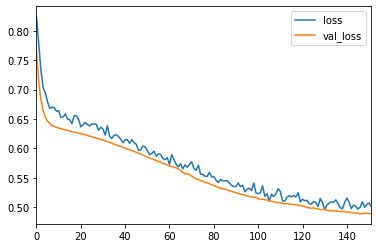

In [68]:
metrics[['loss', 'val_loss']].plot()

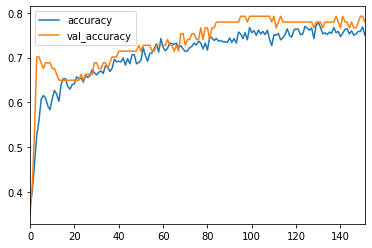

In [69]:
metrics[['accuracy', 'val_accuracy']].plot()

In [70]:
pred = model.predict_classes(X_test)

In [71]:
model.evaluate(X_test, y_test,verbose=0)

[0.48839120973240246, 0.77922076]

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.73      0.59      0.65        27

    accuracy                           0.78        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.77      0.78      0.77        77



In [74]:
print(confusion_matrix(y_test, pred))

[[44  6]
 [11 16]]


In [77]:
model.save('models/diabetes.h5')